
Starting UCI-Pima Indian Diabetes Database
--------------------------------------------

Data Sample
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...               

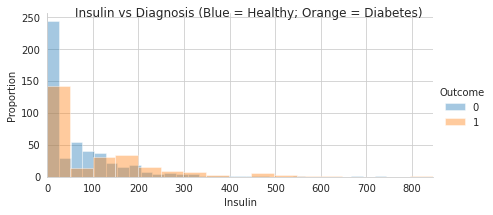

<Figure size 432x288 with 0 Axes>

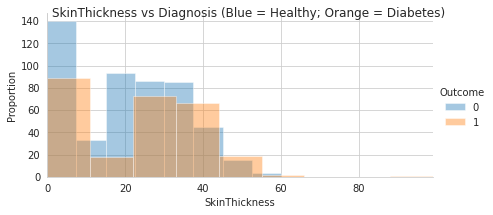

<Figure size 432x288 with 0 Axes>

Labels of the dataset
{0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'}

# of Non-0s in each column: 
Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     268
dtype: int64
# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values
--------------------------------------
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Column Name              % Null Values
--------------------------------------
Pregnancies                 14.453125
Glucose  

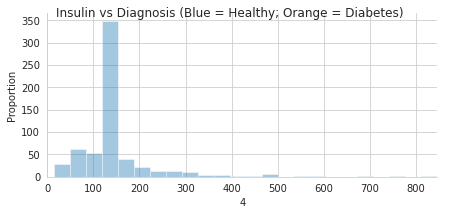

<Figure size 432x288 with 0 Axes>

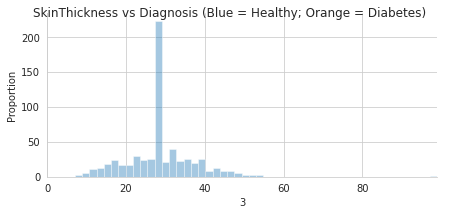

<Figure size 432x288 with 0 Axes>


Confirming all 0s in the attributes are removed completely..
Column #, # of Zero Values
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Heat Map Correlation Matrix
                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]

*******    Now, onto Training models with the training datas

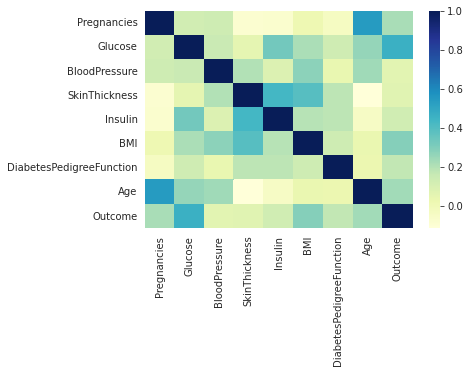

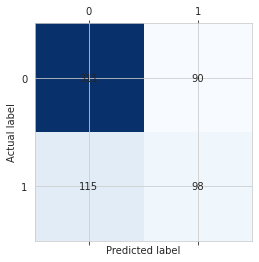

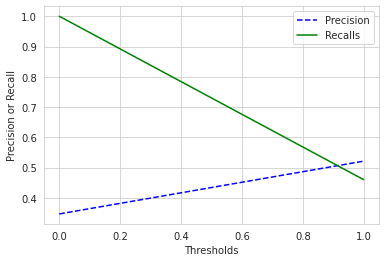

Precision score at 50% precision from confusion matrix   :  0.5212765957446809
Recall score at 50% precision from confusion matrix      :  0.460093896713615
f1 score at 50% precision from confusion matrix          :  0.48877805486284287


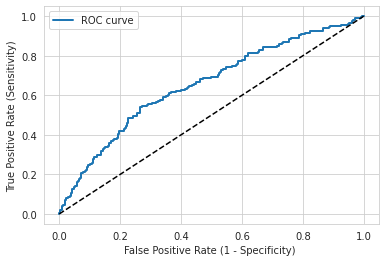


ROC Score from SGDClassifier      :  0.6538466041469098


 ********* RandomForestClassifier ********

Cross Validation scores
RandomForestClassifier StratifiedKFold cross_val_score:  [0.76422764 0.77235772 0.74796748 0.7398374  0.73770492]


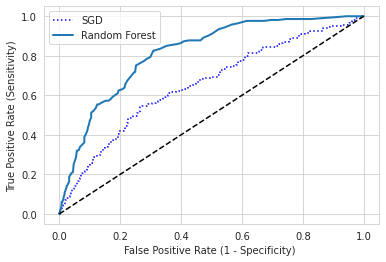

ROC Score from RandomForestClassifier:  0.8158242890426517
Results of Confusion Matrix using RandomForestClassfier:
[[340  61]
 [ 91 122]]



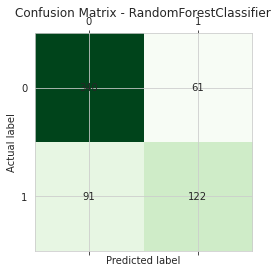

Precision score from confusion matrix with RandomForestClassifer:  0.6666666666666666
Recall score from confusion matrix with RandomForestClassifer   :  0.5727699530516432
f1 score from confusion matrix with RandomForestClassifer       :  0.6161616161616161


 ********* FINAL RESULTS - Comparison of SGDClassifier and RandomForestClassifier ********
 *********     Using the models on the 20% Test dataset that was split earlier    ********

Accuracy of SGDClassifier: 0.64
SGDClassifier - Feature Importance:
Not available

Accuracy of RandomForestClassifier: 0.79
RandomForestClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.253272
5                       BMI        0.162009
7                       Age        0.127697
6  DiabetesPedigreeFunction        0.122779
4                   Insulin        0.098746
2             BloodPressure        0.081233
0               Pregnancies        0.079626
3             SkinThickness       

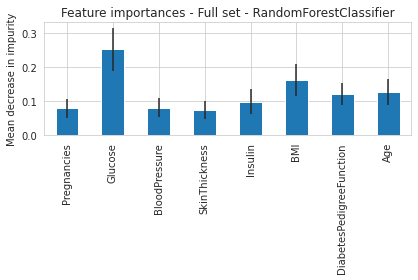

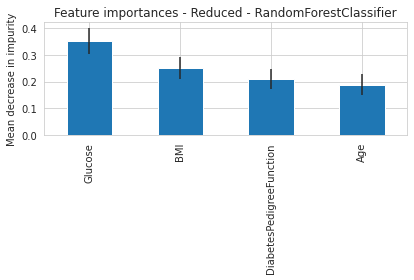

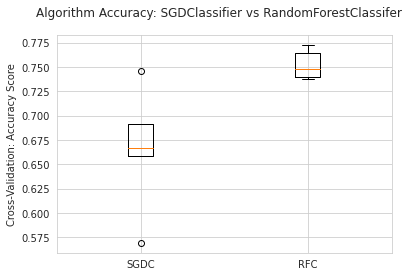

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 14 00:46:58 2021

@author: Balaji V.
CS250 - Final project
Diabetes Prediction from the UCI Machine Learning Repository
Pima Indians Diabetes database
"""

#Section 1
import numpy as np
import pandas as pd
from pandas import read_csv

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 

#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from xgboost import XGBClassifier

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
#from sklearn.neural_network import MLPClassifier as MLPC
#from sklearn.neural_network import MLPClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import seaborn as sns
import itertools
#import graphviz 

import warnings

#BV
from IPython.display import display
import time
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Global declarations
warnings.filterwarnings("ignore")

#Section 2
dict_characters = {0: 'Healthy', 1: 'Diabetes'}
names = []
models = []
resultsAccuracy = []

#Section 3
# *****************  Function Definitions  ***************



#Histogram plots
def plotHistogram(values,label,feature,title):
    
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)

    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.figure()
    plt.show()


#Confusion Matrix plots
def plots_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    
    title='Classifier: Confusion Matrix'
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





#Section 4
# *****************  Data Read and Data Processing  ***************

print("\nStarting UCI-Pima Indian Diabetes Database")
print("--------------------------------------------\n")

#        Section 4-a
#        Data Read

dataset = read_csv('diabetes.csv')
print("Data Sample")
print(dataset.head(10))
#print(dataset)
print("")
index = dataset.index
number_of_rows = len(index)
print("Number of rows of data read from the csv file... ",number_of_rows ) 


#        Section 4-b
#        Data Review
plotHistogram(dataset,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(dataset,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

#        Section 4-c
#        Data Review

print("Labels of the dataset")
labels = {0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'}
print(labels)


#Process 0s and Null values
Nonzeroes = dataset.astype(bool).sum(axis=0)
print('\n# of Non-0s in each column: ')
print(Nonzeroes)

dataset0 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset0.shape)
print("\nColumn Name           # of Null Values")
print("--------------------------------------")
print((dataset0[:] == 0).sum())

print("\nColumn Name              % Null Values")
print("--------------------------------------")
print(((dataset0[:] == 0).sum())/number_of_rows*100)


#Section 5
# *****************  Data Assignments  ***************
#X is all attributes(columns) except the last column (values of prediction class)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

#Now split the data, with 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Use SimpleImputer per book to clear the 0s and NaNs, and fill those 0s with median (use the median strategy)
imputer = SimpleImputer(missing_values=0,strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_test2 = imputer.transform(X_test)
X_train3 = pd.DataFrame(X_train2)

#2nd division of the training data to validate the models,  before using the test split
X_train4, X_validate4, y_train4, y_validate4 = train_test_split(X_train2, y_train, test_size=0.2, random_state=1)

plotHistogram(X_train3,None,4,'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(X_train3,None,3,'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

print("\nConfirming all 0s in the attributes are removed completely..")
print("Column #, # of Zero Values")
print((X_train3[:] == 0).sum())

#Section 6
# *****************  Correlation and Heat Map  ***************

dc = dataset.corr()
print("\nHeat Map Correlation Matrix")
print(dc)
#dc.to_clipboard()

g = sns.heatmap(dc,cmap="YlGnBu",annot=False,)


#Section 7
# *****************  Training Multiple Models with the data ***************
#        Section 7-a Training a Binary Classifier with SGDClassifier
#                    SGD: Stochastic Gradient Descent (Geron book) 

print("\n*******    Now, onto Training models with the training dataset ******\n")
print(" ********* SGDClassifier ********")
print("")


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train2, y_train)

#Output results from SGDClassifier
#print("\nInput  of SGDClassifier")
#print(X_validate4)
#print("\nOutput of SGDClassifier")

sgd_yval = sgd_clf.predict(X_validate4)
#print(sgd_yval)

#print("Some Checks on the arrays")
#print(y_validate4)
#print(y_validate4.shape)
#print(X_validate4.shape)
#print("")
#print(y_train4.shape)
#print(X_train4.shape)

print("Cross Validation scores")
cvs = cross_val_score(sgd_clf, X_train2, y_train, cv=5, scoring= 'accuracy')
print("SGDClassifier StratifiedKFold cross_val_score: ", cvs)

models.append(('SGDC', SGDClassifier()))
resultsAccuracy.append(cvs)
names.append('SGDC')

#        Section 7-b Confusion Matrix with the SGDClassifier model     

y_train_pred = cross_val_predict(sgd_clf, X_train2, y_train, cv=5)
conf_mx1 = confusion_matrix(y_train, y_train_pred)
print('Results of Confusion Matrix using SGDClassfier:')
print(conf_mx1)
print("")
fig, ax = plt.subplots()

ax.matshow(conf_mx1, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mx1):
    #print(z)
    ax.text(j, i, z, ha='center', va='center')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.matshow(conf_mx1,cmap=plt.cm.Blues)

# Precision and Recall
precisscore = precision_score(y_train, y_train_pred)
print('Precision score from confusion matrix using SGDClassifier: ',precisscore)
recallscore = recall_score(y_train, y_train_pred)
print('Recall score from confusion matrix using SGDClassifier   : ',recallscore)
f1score = f1_score(y_train, y_train_pred)
print('f1 score from confusion matrix using SGDClassifier       : ',f1score)

# Using Decision function
y_scores = sgd_clf.decision_function(X_validate4)
#print(y_scores)
threshold = 5000
y_xvalidate4_pred = (y_scores - threshold)
#print(y_xvalidate4_pred)

y_scores = cross_val_predict(sgd_clf, X_train2, y_train, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

fig, ax = plt.subplots()
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recalls")
plt.ylabel('Precision or Recall')
plt.xlabel('Thresholds')
plt.legend()
plt.show()

#Select y_train_pred50
threshold_50_precision = thresholds[np.argmax(precisions >= 0.5)]
y_train_pred_50 = (y_scores >= threshold_50_precision)

precisscore50 = precision_score(y_train, y_train_pred_50)
recallscore50 = recall_score(y_train, y_train_pred_50)

precisscore50 = precision_score(y_train, y_train_pred_50)
print('Precision score at 50% precision from confusion matrix   : ',precisscore50)
recallscore50 = recall_score(y_train, y_train_pred_50)
print('Recall score at 50% precision from confusion matrix      : ',recallscore50)
f1score50 = f1_score(y_train, y_train_pred_50)
print('f1 score at 50% precision from confusion matrix          : ',f1score50)

#ROC curve here
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
fig, ax = plt.subplots()
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate (1 - Specificity) ')
plt.ylabel('True Positive Rate (Sensitivity)')
#plt.xlabel('1 - Specificity')
#plt.ylabel('Sensitivity')
plt.legend()
plt.show()

print("")
#roc_score from SGDClassifier
rocscore = roc_auc_score(y_train, y_scores)
print('ROC Score from SGDClassifier      : ',rocscore)


# *****************  Training Multiple Models with the data ***************
#        Section 8-a Training a Binary Classifier with RandomForestClassifer
#                    RandomForestClassifier: (Geron book) 

print("\n")
print(" ********* RandomForestClassifier ********")
print("")

forest_clf = RandomForestClassifier(random_state =1 )
y_probas_forest = cross_val_predict(forest_clf, X_train2, y_train,cv=5,method = "predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)


print("Cross Validation scores")
cvs_rf = cross_val_score(forest_clf, X_train2, y_train, cv=5, scoring= 'accuracy')
print("RandomForestClassifier StratifiedKFold cross_val_score: ", cvs_rf)

models.append(('RFC ', RandomForestClassifier()))
resultsAccuracy.append(cvs_rf)
names.append('RFC')

fig, ax = plt.subplots()
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate (1 - Specificity) ')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()


#roc_score
rocscore_forest = roc_auc_score(y_train, y_scores_forest)
print('ROC Score from RandomForestClassifier: ',rocscore_forest)


#        Section 8-b Confusion Matrix with the RandomForestClassifier model     

y_train_pred_forest = cross_val_predict(forest_clf, X_train2, y_train, cv=5)
conf_mx_forest = confusion_matrix(y_train, y_train_pred_forest)
print('Results of Confusion Matrix using RandomForestClassfier:')
print(conf_mx_forest)
print("")

fig, ax = plt.subplots()
ax.matshow(conf_mx_forest, cmap=plt.cm.Greens)
for (i, j), z in np.ndenumerate(conf_mx_forest):
    #print(z)
    ax.text(j, i, z, ha='center', va='center')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

# Precision and Recall for RandomForestClassifier
precisscore_forest = precision_score(y_train, y_train_pred_forest)
print('Precision score from confusion matrix with RandomForestClassifer: ',precisscore_forest)
recallscore_forest = recall_score(y_train, y_train_pred_forest)
print('Recall score from confusion matrix with RandomForestClassifer   : ',recallscore_forest)
f1score_forest = f1_score(y_train, y_train_pred_forest)
print('f1 score from confusion matrix with RandomForestClassifer       : ',f1score_forest)



# **************  FINALLY, RUN THE Test dataset with both models **********
#Section 9
# First, SGDClassifer, then RandomForestClassifier

print("\n")
print(" ********* FINAL RESULTS - Comparison of SGDClassifier and RandomForestClassifier ********")
print(" *********     Using the models on the 20% Test dataset that was split earlier    ********")
print("")

feature_names = X.columns.values
sgdclf2 = SGDClassifier(random_state=1)
sgdclf2.fit(X_train2, y_train)
print('Accuracy of SGDClassifier: {:.2f}'.format(sgdclf2.score(X_test2, y_test)))
columns = X.columns
#coefficients = sgdclf2.feature_importances_.reshape(X.columns.shape[0], 1)
#absCoefficients = abs(coefficients)
#fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('SGDClassifier - Feature Importance:')
#print('\n',fullList,'\n')
print("Not available")

print("")
feature_names = X.columns.values
#rfclf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
rfclf2 = RandomForestClassifier(random_state=1)
rfclf2.fit(X_train2, y_train)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(rfclf2.score(X_test2, y_test)))
columns = X.columns
coefficients = rfclf2.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

importances = rfclf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf2.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances - Full set - RandomForestClassifier")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


#Reduced set of Attributes
#By dropping 4 out of 8 attributes that scored lower in the models
data2 = dataset.drop(['Pregnancies','BloodPressure','SkinThickness','Insulin'], axis=1)
X2 = data2.iloc[:, :-1]
y2 = data2.iloc[:, -1]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.2, random_state=1)

#imputer = Imputer(missing_values=0,strategy='median') DEPRECATED
imputer = SimpleImputer(missing_values=0,strategy='median')
X_train3 = imputer.fit_transform(X_train3)
X_test3 = imputer.transform(X_test3)
rfclf4 = RandomForestClassifier(random_state=1)
rfclf4.fit(X_train3, y_train3)
print('Accuracy of RandomForestClassifier in Reduced Feature Space: {:.2f}'.format(rfclf4.score(X_test3, y_test3)))
columns = X2.columns
coefficients = rfclf4.feature_importances_.reshape(X2.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Reduced attributes - Feature Importance:')
print('\n',fullList,'\n')

feature_names2 = X2.columns.values
importances2 = rfclf4.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rfclf4.estimators_], axis=0)
forest_importances2 = pd.Series(importances2, index=feature_names2)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=std2, ax=ax)
ax.set_title("Feature importances - Reduced - RandomForestClassifier")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Boxplot
fig = plt.figure()
fig.suptitle('Algorithm Accuracy: SGDClassifier vs RandomForestClassifer')
ax = fig.add_subplot(111)
plt.boxplot(resultsAccuracy)
ax.set_xticklabels(names)
ax.set_ylabel('Cross-Validation: Accuracy Score')
plt.show()    
    
time.sleep(2)

# New Section

# New Section